In [64]:
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns

In [34]:
df1=pd.read_csv("takehome_users.csv",encoding="latin-1")
df2=pd.read_csv("takehome_user_engagement.csv")

In [35]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [36]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [37]:
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [39]:
df2.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [40]:
df1.duplicated().value_counts()

False    12000
dtype: int64

In [41]:
df2.duplicated().value_counts()

False    207917
dtype: int64

No duplicate data is there,
checking for unique data in both dataframe

In [43]:
df1.rename(columns={"object_id":"user_id"},inplace=True) #renaming to user_id and updating data frame
df1["user_id"].nunique()

12000

In [44]:
df2["user_id"].nunique()

8823

In df2 (Users_engagement) dataframe, there is data for 8823 out of 12000 users

rolling method to find users who are active on three separate days in atleast one sevenday period

In [45]:
df2_temp=df2.copy()         #making one more copy
df2_temp["date"]= pd.to_datetime(df2_temp['time_stamp']).dt.date

In [46]:
df2_temp

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06
207913,2013-01-15 18:28:37,11997,1,2013-01-15
207914,2014-04-27 12:45:16,11998,1,2014-04-27
207915,2012-06-02 11:55:59,11999,1,2012-06-02


In [47]:
def rolling_cnt(df2_temp_group,freq):
    return df2_temp_group.rolling(freq,on="date",min_periods=0)["user_id"].count()
df2_temp["visit_in_a_week"]=df2_temp.groupby("user_id",as_index=False,group_keys=False).apply(rolling_cnt,7)

In [48]:
df2_temp

,time_stamp,user_id,visited,date,visit_in_a_week
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0
2,2013-11-29 03:45:04,2,1,2013-11-29,2.0
3,2013-12-09 03:45:04,2,1,2013-12-09,3.0
4,2013-12-25 03:45:04,2,1,2013-12-25,4.0
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,1.0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,1.0
207914,2014-04-27 12:45:16,11998,1,2014-04-27,1.0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,1.0


In [49]:
df2_temp[df2_temp["visit_in_a_week"]>=3]

,time_stamp,user_id,visited,date,visit_in_a_week
3,2013-12-09 03:45:04,2,1,2013-12-09,3.0
4,2013-12-25 03:45:04,2,1,2013-12-25,4.0
5,2013-12-31 03:45:04,2,1,2013-12-31,5.0
6,2014-01-08 03:45:04,2,1,2014-01-08,6.0
7,2014-02-03 03:45:04,2,1,2014-02-03,7.0
...,...,...,...,...,...
207901,2014-05-27 11:04:47,11988,1,2014-05-27,7.0
207902,2014-06-01 11:04:47,11988,1,2014-06-01,7.0
207907,2014-04-28 14:22:45,11991,1,2014-04-28,3.0
207908,2014-05-17 14:22:45,11991,1,2014-05-17,4.0


In [51]:
df2_adopted=df2_temp.groupby("user_id")["visit_in_a_week"].max().reset_index()  #taking maximum value for each userid
df2_adopted["adopted_user"]=df2_temp["visit_in_a_week"].apply(lambda x:1 if x>=3 else 0)
df2_adopted.head()

,user_id,visit_in_a_week,adopted_user
0,1,1.0,0
1,2,7.0,0
2,3,1.0,0
3,4,1.0,1
4,5,1.0,1


In [52]:
df2_adopted["adopted_user"].value_counts()

1    8307
0     516
Name: adopted_user, dtype: int64

In [53]:
df2_adopted.drop("visit_in_a_week",axis=1,inplace=True)
df2_adopted

,user_id,adopted_user
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
...,...,...
8818,11996,1
8819,11997,1
8820,11998,1
8821,11999,1


In [54]:
df2_adopted.set_index("user_id",inplace=True)
df2_adopted

,adopted_user
user_id,
1,0
2,0
3,0
4,1
5,1
...,...
11996,1
11997,1
11998,1


In [55]:
df=df1.join(df2_adopted,on="user_id",how="outer")   #adopted user column gets added
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1.0


In [56]:
df.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [57]:
df["last_session_creation_time"].fillna(0,inplace=True)
df["adopted_user"].fillna(0,inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,12000.0,6.000500e+03,3.464246e+03,1.0,3000.75,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,12000.0,1.014115e+09,6.087938e+08,0.0,0.00,1.368880e+09,1.393729e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.0,29.00,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.0,3058.00,5.954000e+03,8.817000e+03,1.199900e+04
adopted_user,12000.0,6.922500e-01,4.615817e-01,0.0,0.00,1.000000e+00,1.000000e+00,1.000000e+00


Droping columns which are not useful in future user prediction,

name, email,user_id, creation_time,last_session_creation_time (created the column adopted users)

In [58]:
df.drop(["name","email","user_id","creation_time","last_session_creation_time"],axis=1,inplace=True)
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,GUEST_INVITE,1,0,11,10803.0,0.0
1,ORG_INVITE,0,0,1,316.0,0.0
2,ORG_INVITE,0,0,94,1525.0,0.0
3,GUEST_INVITE,0,0,1,5151.0,1.0
4,GUEST_INVITE,0,0,193,5240.0,1.0


In [59]:
df=pd.get_dummies(df,columns=["creation_source"])
df

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,0.0,1,0,0,0,0
1,0,0,1,316.0,0.0,0,1,0,0,0
2,0,0,94,1525.0,0.0,0,1,0,0,0
3,0,0,1,5151.0,1.0,1,0,0,0,0
4,0,0,193,5240.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,8263.0,1.0,0,1,0,0,0
11996,0,0,200,NaN,1.0,0,0,0,0,1
11997,1,1,83,8074.0,1.0,1,0,0,0,0
11998,0,0,6,NaN,1.0,0,0,1,0,0


In [60]:
corr=df.corr()["adopted_user"]     #correlating with adopted users
corr

opted_in_to_mailing_list              0.015189
enabled_for_marketing_drip            0.015951
org_id                                0.004300
invited_by_user_id                    0.018900
adopted_user                          1.000000
creation_source_GUEST_INVITE          0.003599
creation_source_ORG_INVITE            0.012519
creation_source_PERSONAL_PROJECTS    -0.350111
creation_source_SIGNUP                0.169227
creation_source_SIGNUP_GOOGLE_AUTH    0.193378
Name: adopted_user, dtype: float64

<AxesSubplot:>

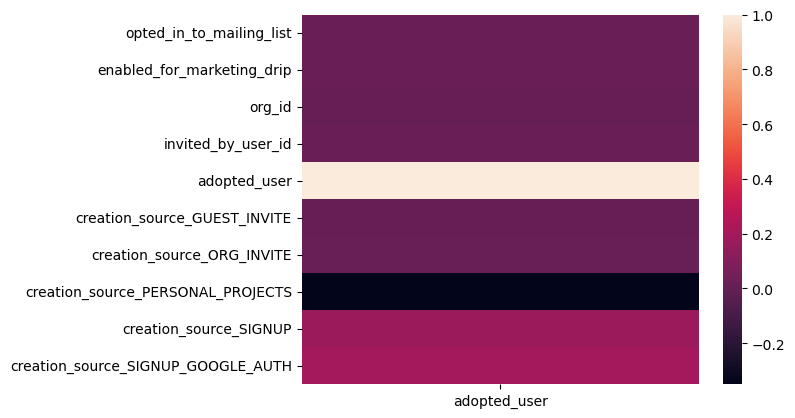

In [61]:
corr=pd.DataFrame(corr)
sns.heatmap(corr)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
invited_by_user_id,6417.0,5962.957145,3383.761968,3.0,3058.0,5954.0,8817.00,11999.0
adopted_user,12000.0,0.692250,0.461582,0.0,0.0,1.0,1.00,1.0
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.0,0.0,0.0,0.00,1.0
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.0,0.0,0.0,1.00,1.0
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP_GOOGLE_AUTH,12000.0,0.115417,0.319537,0.0,0.0,0.0,0.00,1.0


In [63]:
var=df.var()     #higher the variance more important in model building
var.sort_values(ascending=False)

invited_by_user_id                    1.144985e+07
org_id                                1.539007e+04
creation_source_ORG_INVITE            2.288488e-01
adopted_user                          2.130577e-01
opted_in_to_mailing_list              1.872654e-01
creation_source_GUEST_INVITE          1.477723e-01
creation_source_PERSONAL_PROJECTS     1.449821e-01
creation_source_SIGNUP                1.436816e-01
enabled_for_marketing_drip            1.270435e-01
creation_source_SIGNUP_GOOGLE_AUTH    1.021042e-01
dtype: float64